## Basic Idea and Motivation
The core concept of this project is to analyze tennis matches data from 2015 to 2023 between men and women. 
This analysis aims to uncover trends, patterns, and insights related to match outcomes, player performances, and tournament characteristics. The motivation behind choosing this topic stems from a keen interest in sports analytics and the desire to understand how data-driven insights can influence strategies in tennis.

## Data Structure
The dataset comprises 18 files, one for each year from 2015 to 2023, with each file containing detailed records of matches played in those years. The data is categorized by gender, with separate files available for men's and women's matches.


In [431]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler

### Overlooking the Data

Before diving into detailed data checks, let's have an overview of the data.


In [432]:
years = range(2015, 2024)
men_data = pd.concat([pd.read_csv(f'../project/tennis_matches/atp_matches_{year}.csv') for year in years])
women_data = pd.concat([pd.read_csv(f'../project/tennis_matches/wta_matches_{year}.csv') for year in years])
combined_data = pd.concat([men_data, women_data])
print("Overlooking Data:")
print(combined_data.head())

Overlooking Data:
  tourney_id tourney_name surface  draw_size tourney_level  tourney_date  \
0   2015-339     Brisbane    Hard         28             A      20150104   
1   2015-339     Brisbane    Hard         28             A      20150104   
2   2015-339     Brisbane    Hard         28             A      20150104   
3   2015-339     Brisbane    Hard         28             A      20150104   
4   2015-339     Brisbane    Hard         28             A      20150104   

   match_num  winner_id winner_seed winner_entry  ... l_1stIn l_1stWon  \
0          1     105357         NaN           WC  ...    31.0     20.0   
1          2     103813         NaN          NaN  ...    50.0     26.0   
2          3     105902         NaN           WC  ...    37.0     22.0   
3          4     104871         NaN          NaN  ...    38.0     30.0   
4          5     105373         NaN          NaN  ...    62.0     40.0   

   l_2ndWon l_SvGms  l_bpSaved  l_bpFaced winner_rank winner_rank_points  \
0   

The initial data examination shows a comprehensive tennis match dataset that captures a wide array of information, from tournament details to individual match stats. The dataset appears to be structured and formatted in a way that lends itself to robust analysis. The presence of some missing values suggests that data cleaning might be necessary before deeper analytical tasks. Overall, the dataset's richness presents a promising opportunity for thorough exploration into the world of professional tennis tournaments.

## Reliability and Sanity Check


### Check Consistency Between Men's and Women's Data

In [433]:

def compare_datasets_columns(df1, df2, gender1, gender2):
    if not df1.columns.equals(df2.columns):
        print(f"Column inconsistencies between {gender1} and {gender2} data:")
        print("Differences:")
        print(set(df1.columns) ^ set(df2.columns)) 
    else:
        print(f'There are no inconsistencies across database columns between {gender1} and {gender2}.')


compare_datasets_columns(men_data, women_data, "men's", "women's")

There are no inconsistencies across database columns between men's and women's.


### Checking Data Types

In [434]:
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 46658 entries, 0 to 2276
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          46658 non-null  object 
 1   tourney_name        46658 non-null  object 
 2   surface             46658 non-null  object 
 3   draw_size           46658 non-null  int64  
 4   tourney_level       46658 non-null  object 
 5   tourney_date        46658 non-null  int64  
 6   match_num           46658 non-null  int64  
 7   winner_id           46658 non-null  int64  
 8   winner_seed         19381 non-null  object 
 9   winner_entry        6456 non-null   object 
 10  winner_name         46658 non-null  object 
 11  winner_hand         46652 non-null  object 
 12  winner_ht           44529 non-null  float64
 13  winner_ioc          46658 non-null  object 
 14  winner_age          46649 non-null  float64
 15  loser_id            46658 non-null  int64  
 16  loser_seed

### Completeness

In [435]:
empty_strings_found = False
placeholders_found = False

for column in combined_data.columns:
    if combined_data[column].dtype == 'object':
        # Check for empty strings in string-type columns
        empty_string_count = (combined_data[column] == '').sum()
        if empty_string_count > 0:
            print(f"Column '{column}' has {empty_string_count} empty strings.")
            empty_strings_found = True
    else:
        # Check for a specific placeholder value in numeric columns, e.g., -1
        placeholder_count = (combined_data[column] == -1).sum()
        if placeholder_count > 0:
            print(f"Column '{column}' has {placeholder_count} placeholder values.")
            placeholders_found = True

if not empty_strings_found:
    print("No empty strings found in any columns.")

if not placeholders_found:
    print("No placeholder values found in any columns.")

No empty strings found in any columns.
No placeholder values found in any columns.


### Duplication

In [436]:
print('Number of duplication in data:')
print(combined_data.duplicated().sum())

Number of duplication in data:
0


### Accuracy check based on the age of players

In [437]:
print('Number of anomalies in data:')

# Function to check if age is in the valid range
def is_age_anomalous(age):
    return age < 14 or age > 50

# Apply the check to both winner_age and loser_age
combined_data['winner_age_anomaly'] = combined_data['winner_age'].apply(is_age_anomalous)
combined_data['loser_age_anomaly'] = combined_data['loser_age'].apply(is_age_anomalous)

# Filter the data to find any matches with age anomalies
age_anomalies = combined_data[combined_data['winner_age_anomaly'] | combined_data['loser_age_anomaly']]

# Display results
print(age_anomalies[['winner_name', 'winner_age', 'loser_name', 'loser_age']])

Number of anomalies in data:
Empty DataFrame
Columns: [winner_name, winner_age, loser_name, loser_age]
Index: []


### Conclusions from Reliability and Sanity Checks
After completing various checks on our tennis match datasets, we're confident that they are reliable. Both the men's and women's data are consistent and accurate, with no duplicates and well-organized formats. While there are some missing values identified, we have verified that all of them are appropriately represented using the standard NaN (Not a Number) format. This verification is crucial as it ensures that pandas functions will correctly recognize and handle these missing values during our data analysis processes. This means we can use these datasets effectively to analyze and understand trends in tennis matches.


## Basic Statistics and Visualization

### Distribution of Winner's Ages and Winner's Rank
**Goal:**
In the analytical exploration of tennis match data, examining the distribution of key variables such as players' ages and ranks is critical. These distributions provide foundational insights into the demographic and competitive landscape of the sport. By understanding the typical age range of winning players, we can infer aspects of peak performance years and career longevity. Analyzing the distribution of winners' ranks allows us to grasp the hierarchy within the sport, indicating how often higher-ranked players secure victories and how competitive the field is.

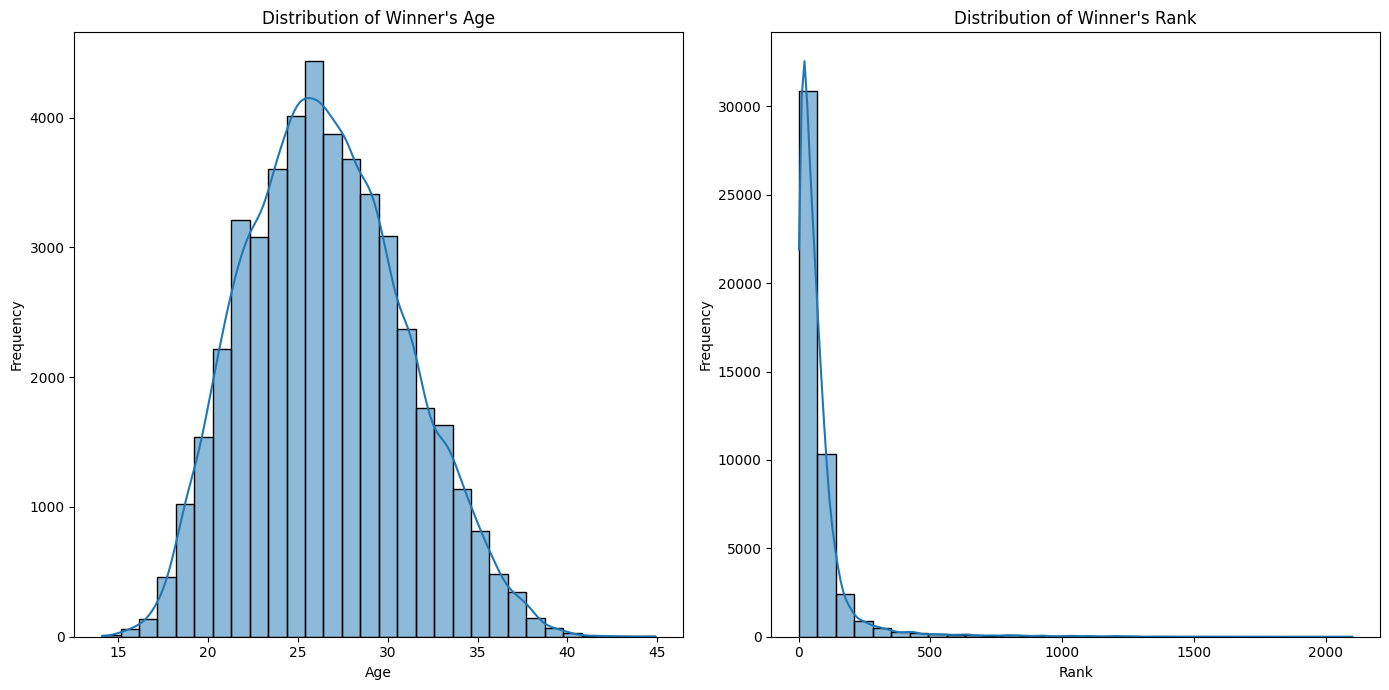

In [438]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(combined_data['winner_age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Winner\'s Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Distribution of winner's rank
plt.subplot(1, 2, 2)
sns.histplot(combined_data['winner_rank'].dropna(), bins=30, kde=True)
plt.title('Distribution of Winner\'s Rank')
plt.xlabel('Rank')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Insights from the Distribution Graphs**

The histogram of winners' ages shows a bell-shaped distribution, indicating that most winners are in their mid-twenties to early thirties, a common peak performance age range in professional tennis. This suggests that experience and physical maturity are key factors in securing match victories.

On the other hand, the distribution of winners' ranks is heavily skewed towards the lower numbers, highlighting that top-ranked players (lower rank numbers) more frequently win matches. This skewness emphasizes the disparity in success rates between top-ranked players and the rest of the competitors, with higher-ranked players dominating match outcomes.

Together, these graphs provide a clear visual summary of the age and competitive standing of match winners, which are valuable for strategic planning in coaching, training, and tournament preparation.

### Comparative Analysis of Winner's Rank and Number of Aces by Gender
The analysis of the relationship between the winner's rank and the number of aces served in matches provides insights into the dynamics of competitive advantage in tennis. By examining how often high-ranking players (who have lower rank numbers) achieve a high number of aces compared to their lower-ranking counterparts, we can assess the impact of serving prowess relative to players' rankings. This analysis can help identify whether serving ability is a distinguishing characteristic of top-ranked players and how it might contribute to their success in matches.

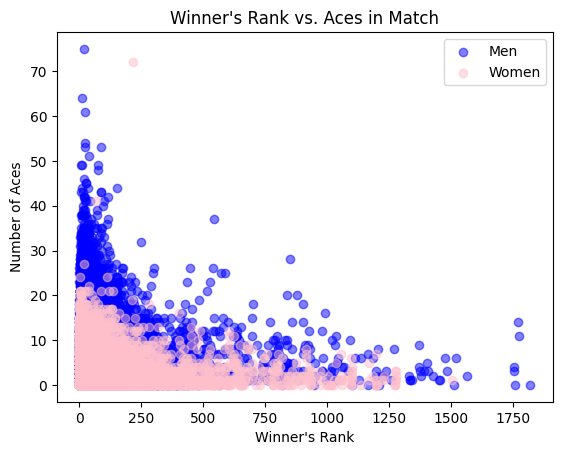

In [439]:
plt.scatter(men_data['winner_rank'], men_data['w_ace'], alpha=0.5, label='Men', color='blue')
plt.scatter(women_data['winner_rank'], women_data['w_ace'], alpha=0.5, label='Women', color='pink')
plt.title('Winner\'s Rank vs. Aces in Match')
plt.xlabel('Winner\'s Rank')
plt.ylabel('Number of Aces')
plt.legend()
plt.show()

While higher-ranked players in both genders tend to serve more aces, men show a higher frequency of aces across all ranks when compared to women, and there is significant variability among lower-ranked players. The outliers in the men's data suggest that rank is not the only predictor of aces served, as even some lower-ranked players can outperform in this aspect.

### Serving High: The Correlation Between Player Height and Ace Count
This analysis aims to explore the potential advantages conferred by physical attributes in professional tennis. By assessing the average number of aces served across different height categories for male and female players, we can identify trends and determine if taller players have a distinct advantage in serving aces, which is a key component of a successful tennis game. 

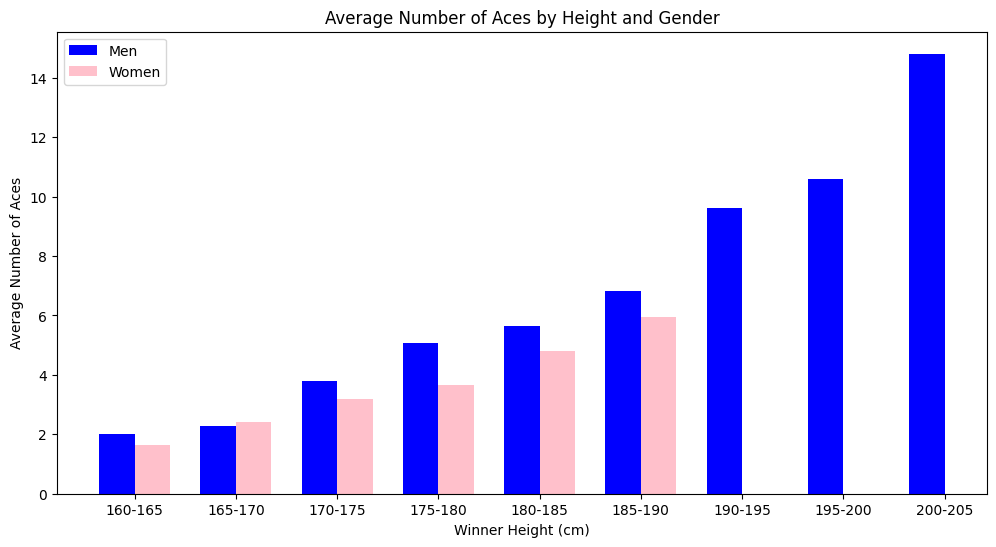

In [440]:
# Define height bins
bins = np.arange(start=160, stop=210, step=5)
height_categories = pd.cut([], bins).categories

men_data['height_bin'] = pd.cut(men_data['winner_ht'], bins)
women_data['height_bin'] = pd.cut(women_data['winner_ht'], bins)

# Calculate average aces for each bin and reindex with all height categories to align both
# Set observed=True explicitly to avoid the warning
avg_aces_men = men_data.groupby('height_bin', observed=True)['w_ace'].mean().reindex(height_categories)
avg_aces_women = women_data.groupby('height_bin', observed=True)['w_ace'].mean().reindex(height_categories)

# The indices for the x-axis now need to be the length of the new reindexed averages
ind = np.arange(len(height_categories))

# Now plot with the new indices
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35  # width of the bars

ax.bar(ind - width/2, avg_aces_men, width, label='Men', color='blue')
ax.bar(ind + width/2, avg_aces_women, width, label='Women', color='pink')

ax.set_xlabel('Winner Height (cm)')
ax.set_ylabel('Average Number of Aces')
ax.set_title('Average Number of Aces by Height and Gender')
ax.set_xticks(ind)
ax.set_xticklabels([f'{int(left)}-{int(right)}' for left, right in zip(bins[:-1], bins[1:])])
ax.legend()

plt.show()


Based on the bar chart, the following conclusions can be drawn:

1. **Height and Serving Advantage**: There is a general trend that as the height of the players increases, the average number of aces served in a match also increases. This trend is observable in both men and women, suggesting that taller players may have a serving advantage, possibly due to the leverage and angle they can create.

2. **Gender Differences**: For almost every height category, men serve more aces on average than women. This difference may be due to physiological factors, differences in play style, or other aspects of the game such as service speed that are not captured by this chart alone.

3. **Height Categories with Maximum Aces**: The highest average number of aces is served by men in the 200-205 cm height category. For women, while the data suggests that the 195-200 cm height category serves the most aces on average, the sample size for women in this height range is typically small, so this result should be interpreted with caution.

In conclusion, this chart reinforces the concept that height is a significant factor in serving aces in tennis, with taller players generally having an edge. 

### Service Game Analysis in Tennis Matches
We want to dissect components of the service game within tennis matches, focusing on aces served, double faults, breakpoints saved, and breakpoints faced. By evaluating these metrics through density plots, we gain an understanding of serving strengths, pressures, and vulnerabilities in play.

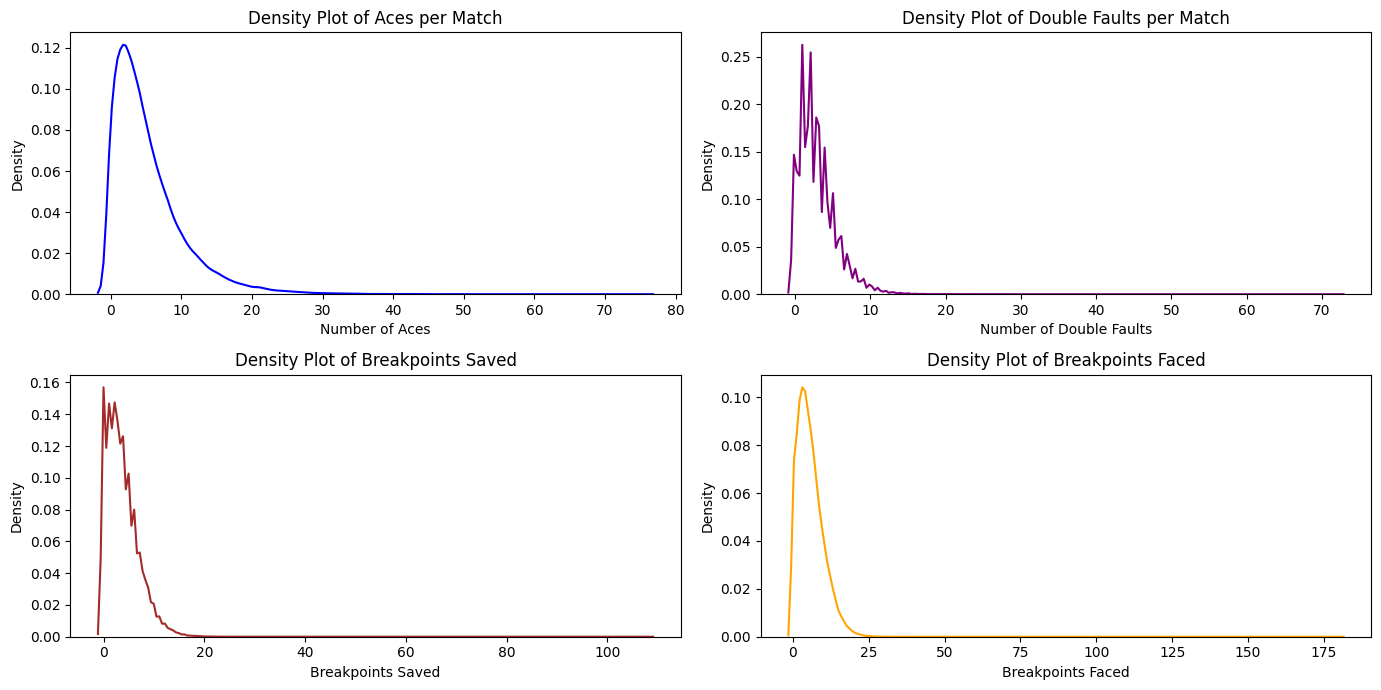

In [441]:

plt.figure(figsize=(14, 7))

# Density plot for number of aces per match by winners
plt.subplot(2, 2, 1)
sns.kdeplot(combined_data['w_ace'].dropna(), color="blue")
plt.title('Density Plot of Aces per Match')
plt.xlabel('Number of Aces')
plt.ylabel('Density')

# Density plot for number of double faults per match by winners
plt.subplot(2, 2, 2)
sns.kdeplot(combined_data['w_df'].dropna(), color="purple")
plt.title('Density Plot of Double Faults per Match')
plt.xlabel('Number of Double Faults')
plt.ylabel('Density')

# Density plot for breakpoints saved per match by winners
plt.subplot(2, 2, 3)
sns.kdeplot(combined_data['w_bpSaved'].dropna(), color="brown")
plt.title('Density Plot of Breakpoints Saved')
plt.xlabel('Breakpoints Saved')
plt.ylabel('Density')

# Density plot for breakpoints faced per match by winners
plt.subplot(2, 2, 4)
sns.kdeplot(combined_data['w_bpFaced'].dropna(), color="orange")
plt.title('Density Plot of Breakpoints Faced')
plt.xlabel('Breakpoints Faced')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


The density plots reveal several trends:

Aces per match are generally low, with a peak for both genders at a lower number of aces, suggesting that while powerful serves are advantageous, they are not commonly the sole factor in winning points.
Double faults per match show a sharp peak at lower values, indicating that while players do commit serving errors, they are relatively infrequent occurrences for the majority.
Breakpoints saved have a similar distribution to aces, suggesting that players are often able to fend off a few breakpoints in a match but saving a large number is uncommon.
Breakpoints faced display a wider spread, with players facing varying amounts of pressure on their serve across matches.

### Surface Type Distribution in Tennis Match Wins
This analysis is conducted to investigate the distribution of tennis match wins across different surface types for men's and women's matches. Understanding the prevalence of each surface in match victories can provide insights into the surface-specific dynamics of the sport and possibly reflect player adaptability and proficiency.

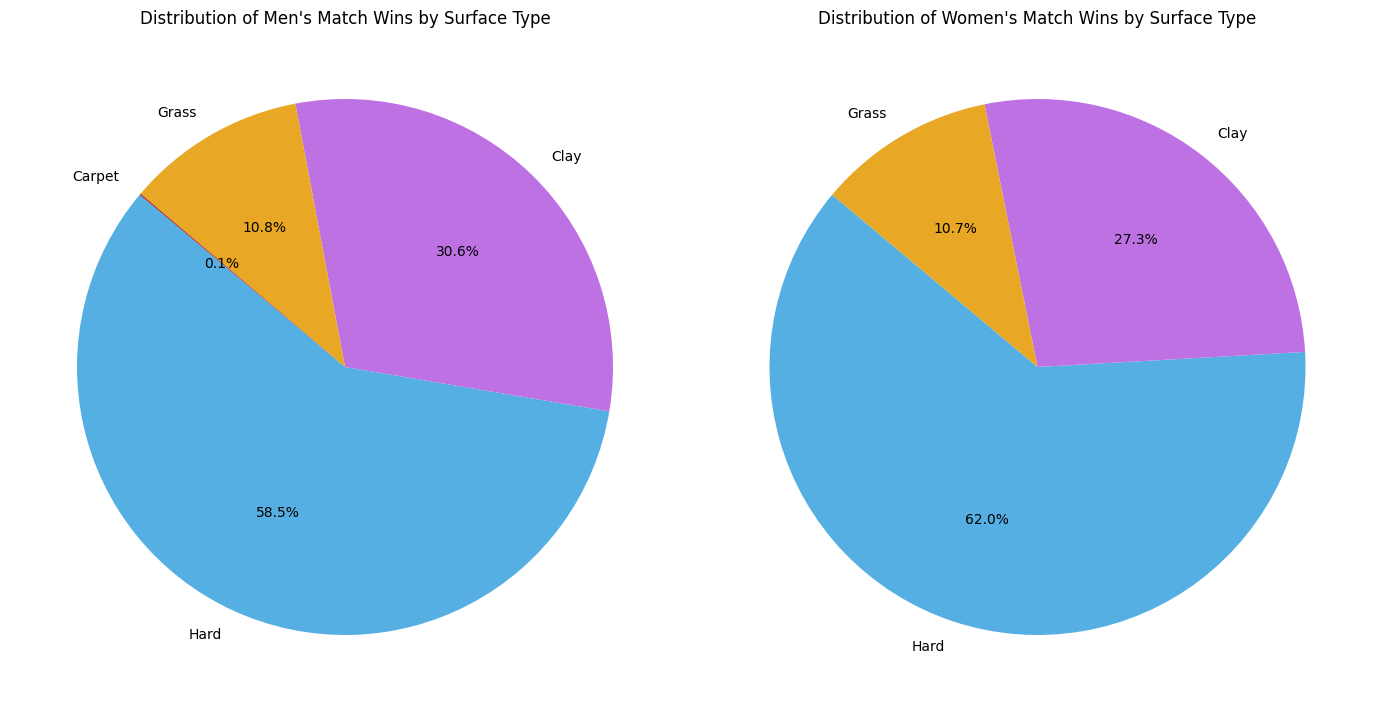

In [442]:

# Calculate the counts for each surface type for men and women
men_surface_counts = men_data['surface'].value_counts()
women_surface_counts = women_data['surface'].value_counts()

# Define colors for the pie charts
colors = ['#56afe3','#bd71e3','#e8a725','#A52A2A']

# Create a pie chart for men
plt.figure(figsize=(14, 7))

# Pie chart for men
plt.subplot(1, 2, 1)
plt.pie(men_surface_counts, labels=men_surface_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Men\'s Match Wins by Surface Type')

# Pie chart for women
plt.subplot(1, 2, 2)
plt.pie(women_surface_counts, labels=women_surface_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Women\'s Match Wins by Surface Type')

# Show the plots
plt.tight_layout()
plt.show()


The pie charts illustrate that a significant majority of matches, for both men and women, are won on hard courts, indicating a prevalence of this surface type in tennis tournaments. Clay courts hold the next highest percentage of match wins, followed by grass courts, which account for roughly an equal proportion of wins between genders. Carpet, as a surface, represents a negligible fraction of matches, highlighting its rarity in the current professional circuit. These distributions underscore the importance of hard and clay courts in contemporary tennis.

# Methodology

## Introduction
In this research block, our primary focus lies in uncovering patterns and forecasting the probability of winning tournaments.

## Preparing the data:

Dual Records for Each Match: The data was transformed to create dual records for each match, representing each player's perspective. This step is crucial for modeling the outcome (win/lose) for each player in each match.

Handling Missing Values: Numerical columns were filled with the median of their respective values to address missing data. This is a common practice to maintain the integrity of the dataset.

One-Hot Encoding for Categorical Variables: Categorical variables were encoded into a numerical format using one-hot encoding. This is necessary because linear regression models cannot interpret textual or categorical data directly.

Normalization of Numerical Variables: The numerical variables were scaled using standard scaling. This step is important in linear regression to ensure that all variables contribute equally to the model's predictions and to improve the convergence of gradient descent during the optimization.

After these preprocessing steps, the data should be in a format that is ready for linear regression modeling. Each feature (both originally numerical and those transformed from categorical variables) is now a numerical value, which is a requirement for linear regression.

In [446]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from collections import Counter

# Count the number of matches for each player
player_match_counts = Counter(combined_data['winner_id']) + Counter(combined_data['loser_id'])

# Filter out players with fewer than 3 matches
combined_data = combined_data[combined_data['winner_id'].map(player_match_counts) >= 20]
combined_data = combined_data[combined_data['loser_id'].map(player_match_counts) >= 20]

# Create duplicate records for each match
match_records = []
for _, row in combined_data.iterrows():
    player1_record = {**row, 'is_winner': 1}
    match_records.append(player1_record)

    player2_record = {**row, 'is_winner': 0}
    match_records.append(player2_record)

# Convert to DataFrame
match_df = pd.DataFrame(match_records)

# Update columns to remove, keeping the relevant features
columns_to_remove = ['tourney_date', 'match_num', 'winner_entry', 'loser_entry', 
                     'winner_ioc', 'loser_ioc', 'draw_size', 'tourney_id', 'tourney_name', 
                     'winner_id', 'loser_id', 'winner_name', 'loser_name', 'score', 'round', 'winner_seed', 'loser_seed']
match_df = match_df.drop(columns=columns_to_remove, axis=1)

# Select the target variable and features
target = match_df['is_winner']
features = match_df.drop(['is_winner'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Handle missing values
numerical_cols = ['winner_age', 'loser_age', 'winner_ht', 'loser_ht', 'minutes',
                  'w_ace', 'l_ace', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'l_1stIn', 
                  'l_1stWon', 'l_2ndWon', 'l_SvGms', 'w_df', 'l_df', 'w_svpt', 'l_svpt',
                  'w_bpSaved', 'w_bpFaced', 'l_bpSaved', 'l_bpFaced', 'winner_rank', 
                  'loser_rank', 'winner_rank_points', 'loser_rank_points', 'best_of']
for col in numerical_cols:
    X_train[col] = X_train[col].fillna(X_train[col].median())
    X_test[col] = X_test[col].fillna(X_train[col].median())

# Apply One-Hot Encoding to categorical variables
categorical_cols = ['tourney_level', 'surface', 'winner_hand', 'loser_hand']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_cols])

# Retrieve feature names for encoded columns
categories = one_hot_encoder.categories_
encoded_feature_names = []
for col, cats in zip(categorical_cols, categories):
    for cat in cats:
        encoded_feature_names.append(f"{col}_{cat}")

# Convert encoded data to DataFrame and assign feature names
X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=encoded_feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded.toarray(), columns=encoded_feature_names, index=X_test.index)

# Combine encoded categorical columns with numeric columns
X_train = X_train.drop(categorical_cols, axis=1)
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)

X_test = X_test.drop(categorical_cols, axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)

# Normalization of numeric variables
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Display the structure of the modified DataFrame (for demonstration)
X_train.head()

print(X_train.select_dtypes(include=['object']).columns)

Index([], dtype='object')


## Linear Regression Model Training and Evaluation 

In [447]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train a linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predict values ​​for test data set
y_pred = linear_regressor.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.2503063105412616
R^2 Score: -0.0012448548459638165


These metrics indicate unsatisfactory model quality, which poorly explains the data variation. 
To improve the results, let's consider trying different machine learning models and methods.

## Comparative Evaluation of Classification Models

In [448]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a decision tree model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Model training
dt_classifier.fit(X_train, y_train)

# Making predictions on the test data set
y_pred_dt = dt_classifier.predict(X_test)

# Model evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Accuracy of Decision Tree Classifier:", accuracy_dt)
print("Classification Report:\n", report_dt)


Accuracy of Decision Tree Classifier: 0.09687730513892304
Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.16      0.15      8098
           1       0.04      0.03      0.04      8170

    accuracy                           0.10     16268
   macro avg       0.09      0.10      0.09     16268
weighted avg       0.09      0.10      0.09     16268



In [449]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Accuracy of Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy of Logistic Regression: 0.48291123678387016
              precision    recall  f1-score   support

           0       0.48      0.53      0.51      8098
           1       0.48      0.44      0.46      8170

    accuracy                           0.48     16268
   macro avg       0.48      0.48      0.48     16268
weighted avg       0.48      0.48      0.48     16268



In [450]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
y_pred_lda = lda_model.predict(X_test)

print("Accuracy of LDA:", accuracy_score(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))


Accuracy of LDA: 0.4838332923530858
              precision    recall  f1-score   support

           0       0.48      0.53      0.51      8098
           1       0.48      0.43      0.46      8170

    accuracy                           0.48     16268
   macro avg       0.48      0.48      0.48     16268
weighted avg       0.48      0.48      0.48     16268



In [451]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("Accuracy of KNN:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


Accuracy of KNN: 0.21428571428571427
              precision    recall  f1-score   support

           0       0.21      0.21      0.21      8098
           1       0.22      0.21      0.22      8170

    accuracy                           0.21     16268
   macro avg       0.21      0.21      0.21     16268
weighted avg       0.21      0.21      0.21     16268



In [452]:
from sklearn.tree import DecisionTreeClassifier

cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, y_train)
y_pred_cart = cart_model.predict(X_test)

print("Accuracy of CART:", accuracy_score(y_test, y_pred_cart))
print(classification_report(y_test, y_pred_cart))


Accuracy of CART: 0.09687730513892304
              precision    recall  f1-score   support

           0       0.14      0.16      0.15      8098
           1       0.04      0.04      0.04      8170

    accuracy                           0.10     16268
   macro avg       0.09      0.10      0.09     16268
weighted avg       0.09      0.10      0.09     16268



Logistic Regression and LDA: Both models demonstrated a similar accuracy of approximately 48.6%. This indicates that they both handle the classification task adequately but do not achieve high accuracy. These models can be a good choice if you require a simple and interpretable model.

k-Nearest Neighbors (KNN): The accuracy of this model is approximately 21.1%, which is significantly better than the Decision Tree model but still not high enough for reliable predictions. One way to improve KNN results is to fine-tune the number of neighbors (n_neighbors) and distance metric.

Decision Trees (CART): This model exhibited the lowest overall accuracy (10%), suggesting its inefficiency for your dataset in its current configuration.

Now, separately, we will continue to work with Logistic Regression.

## Logistic Regression Graphs

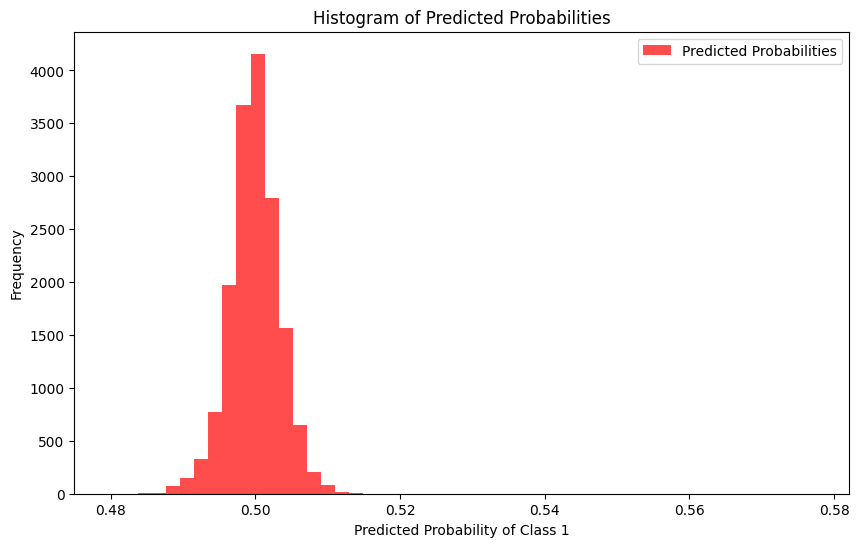

In [ ]:
# Get predicted probabilities for class 1
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]

# Create a histogram of predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(y_pred_prob, bins=50, color='red', alpha=0.7, label='Predicted Probabilities')
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability of Class 1')
plt.ylabel('Frequency')
plt.legend()
plt.show()



Concentration of predictions around 0.5: It can be seen that most of the predicted probabilities are clustered around the value 0.5. This indicates that the model is often unsure of its predictions—it assigns almost equal odds that an observation belongs to class 0 or 1.

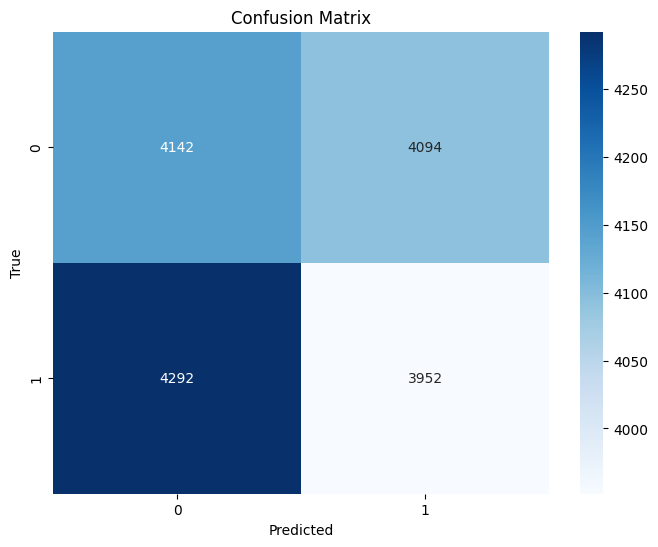

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the error matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Visualization of the error matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

We can observe a similar pattern in this graph. The model has nearly equal counts of true positives and false positives, indicating that it performs well in identifying the positive class but also makes a significant number of mistakes by classifying negative observations as positive. The number of false negatives (FN) is higher than true positives (TP), suggesting that the model is more prone to incorrectly assigning positive cases to the negative class rather than correctly identifying positive cases. Relatively high values of FN and FP may also indicate a lack of clear demarcation between the classes, which could be a sign that the model lacks sufficient discriminatory power or that the features used do not provide enough information for effective class separation

## Conclusion

In this part, we analyzed the effectiveness of a logistic regression model, starting with meticulous data preprocessing. The model was trained for classification, and its performance was evaluated using various metrics, including accuracy, recall, and F1-score. Analysis of the model's coefficients identified key features influencing classification.

The results demonstrated a relationship between data characteristics and their classification. Future research could expand this study by applying more complex models and methods for a deeper data analysis. This will open new opportunities for understanding data and improving algorithms.